In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Read the dataset
df = pd.read_csv('/kaggle/input/crop-yield-data-india/crop_yield.csv')

In [2]:
# Print basic information about the dataset
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [3]:
print("First few rows:")
display(df.head())

First few rows:


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
# Print unique values in categorical columns
print("Unique values in 'Crop':")
display(df['Crop'].unique())
print(f"Total unique crops: {df['Crop'].nunique()}")



Unique values in 'Crop':


array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

Total unique crops: 55


In [5]:
print("\nUnique values in 'Season':")
print(df['Season'].unique())
print(f"Total unique seasons: {df['Season'].nunique()}")


Unique values in 'Season':
['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']
Total unique seasons: 6


In [6]:
print("\nUnique values in 'State':")
print(df['State'].unique())
print(f"Total unique states: {df['State'].nunique()}")


Unique values in 'State':
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' 'Delhi' 'Manipur' 'Jammu and Kashmir' 'Telangana'
 'Arunachal Pradesh' 'Sikkim']
Total unique states: 30


In [7]:
# Function to encode categorical columns
def encoding(data):
    # Identify categorical columns
    categorical_columns = ['Crop', 'Season', 'State']
    # Initialize LabelEncoder
    le = LabelEncoder()

    # Create a copy of the data to avoid modifying the original DataFrame
    encoded_data = data.copy()

    # Encode categorical columns
    for col in categorical_columns:
        encoded_data[col] = le.fit_transform(encoded_data[col])
    
    return encoded_data
# Apply encoding
encoded_df = encoding(df)

In [8]:
# Check for NA values in each column
na_values = df.isna().sum()

# Print the NA values
print("NA values in each column:")
print(na_values)

NA values in each column:
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [9]:
# Check for inf values in each column
inf_values = df.isin([np.inf, -np.inf]).sum()

# Print the inf values
print("Infinite values in each column:")
print(inf_values)

Infinite values in each column:
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

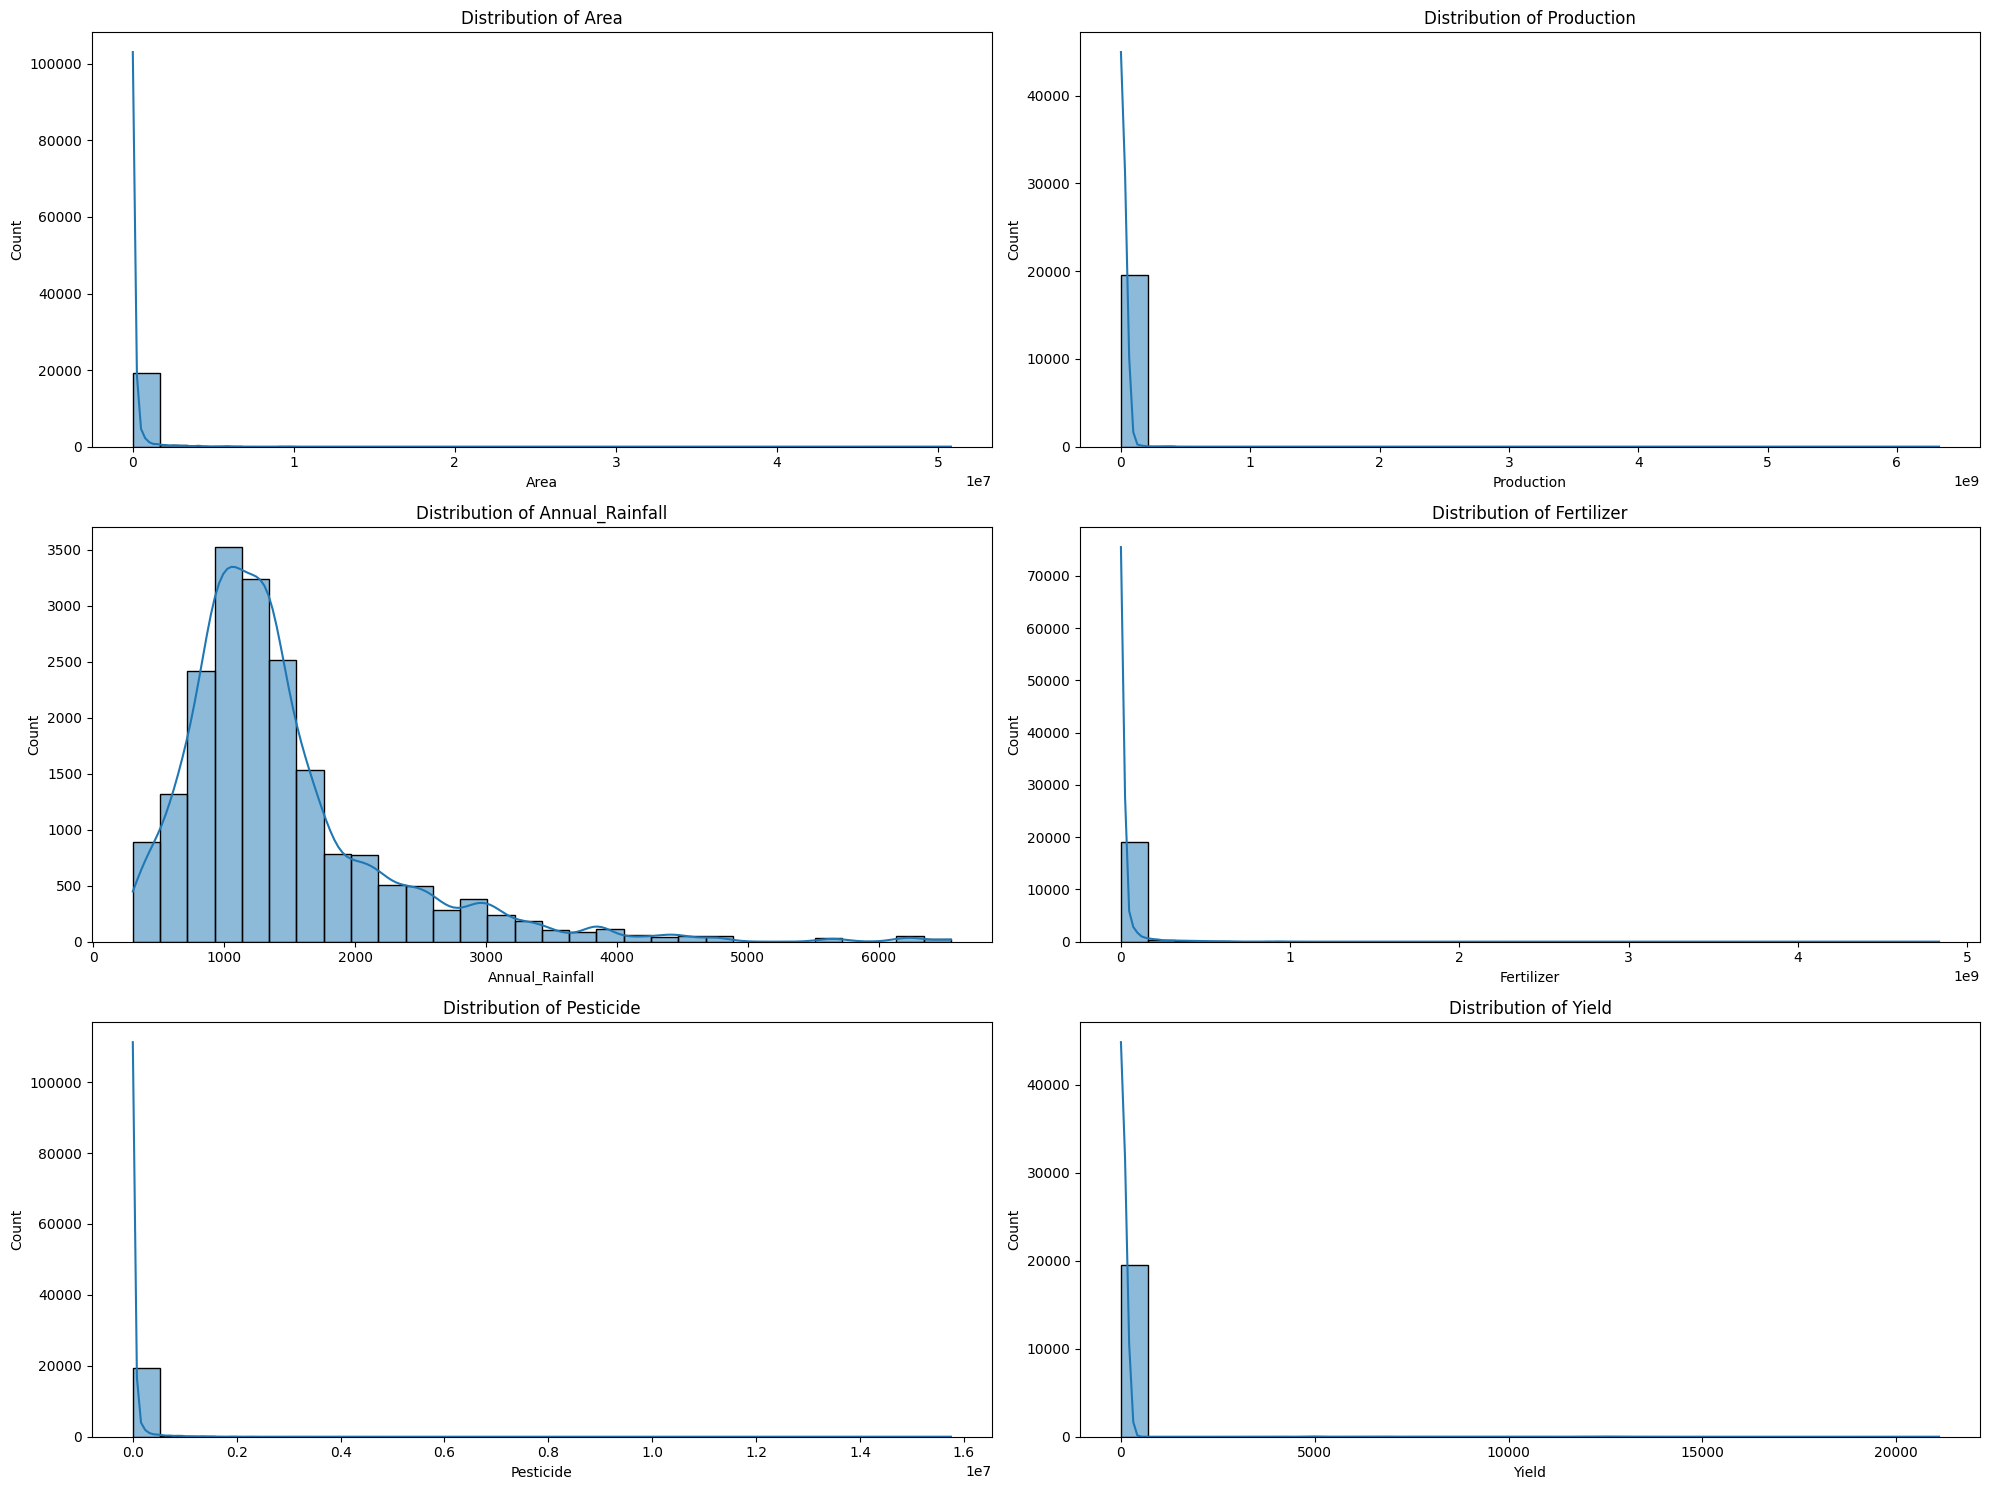

In [10]:
# 1. Histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

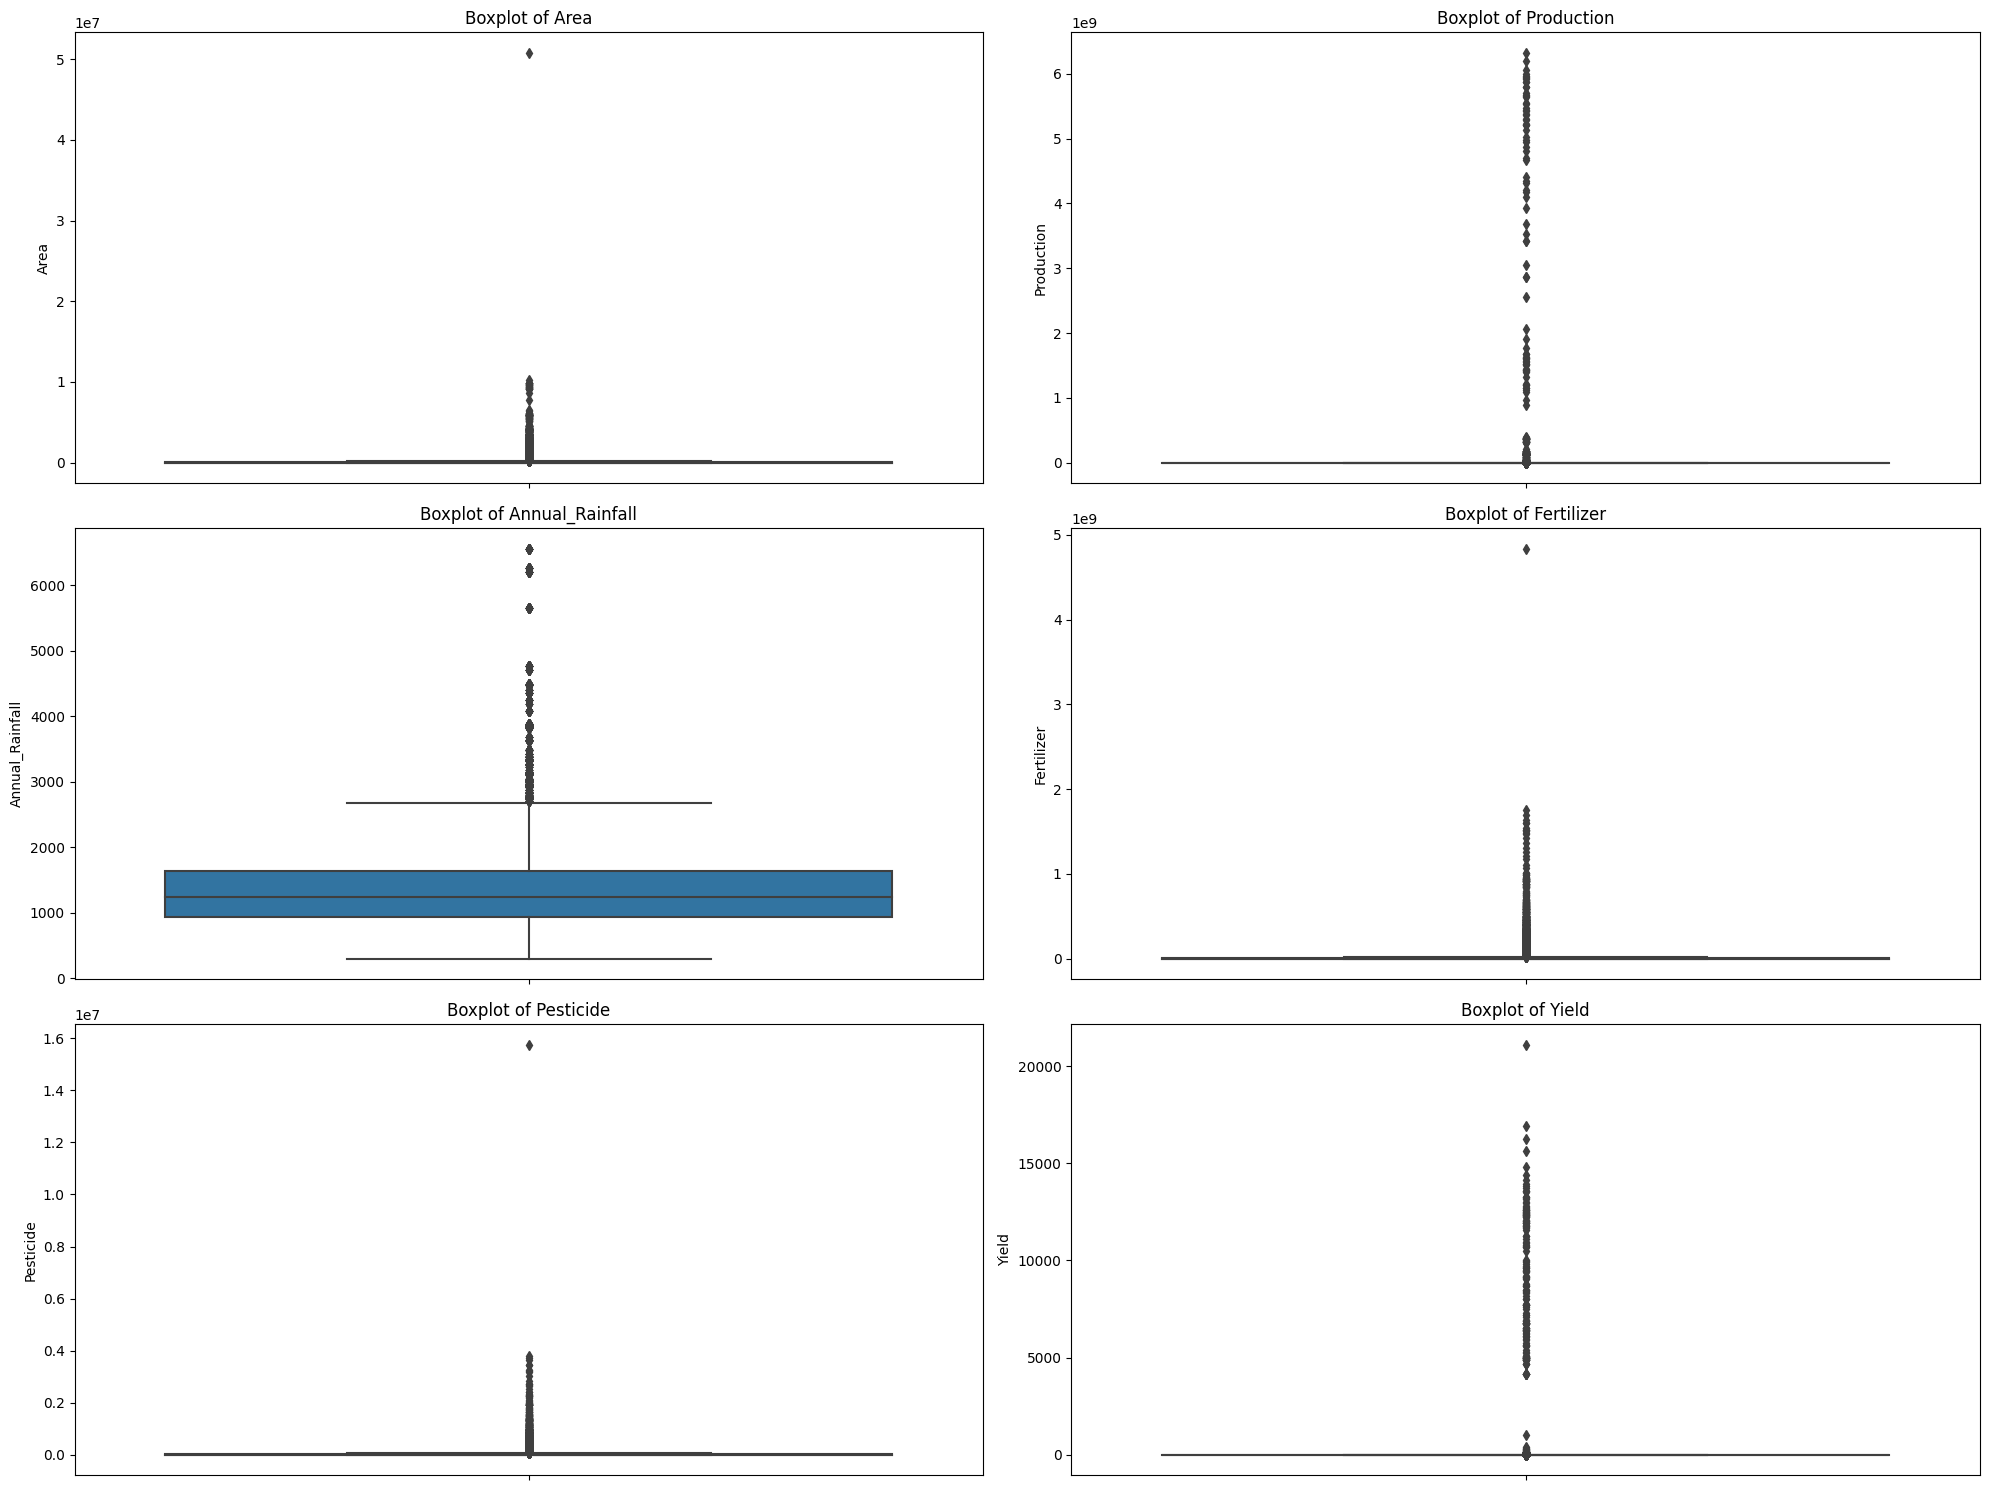

In [11]:
# 2. Box Plots to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

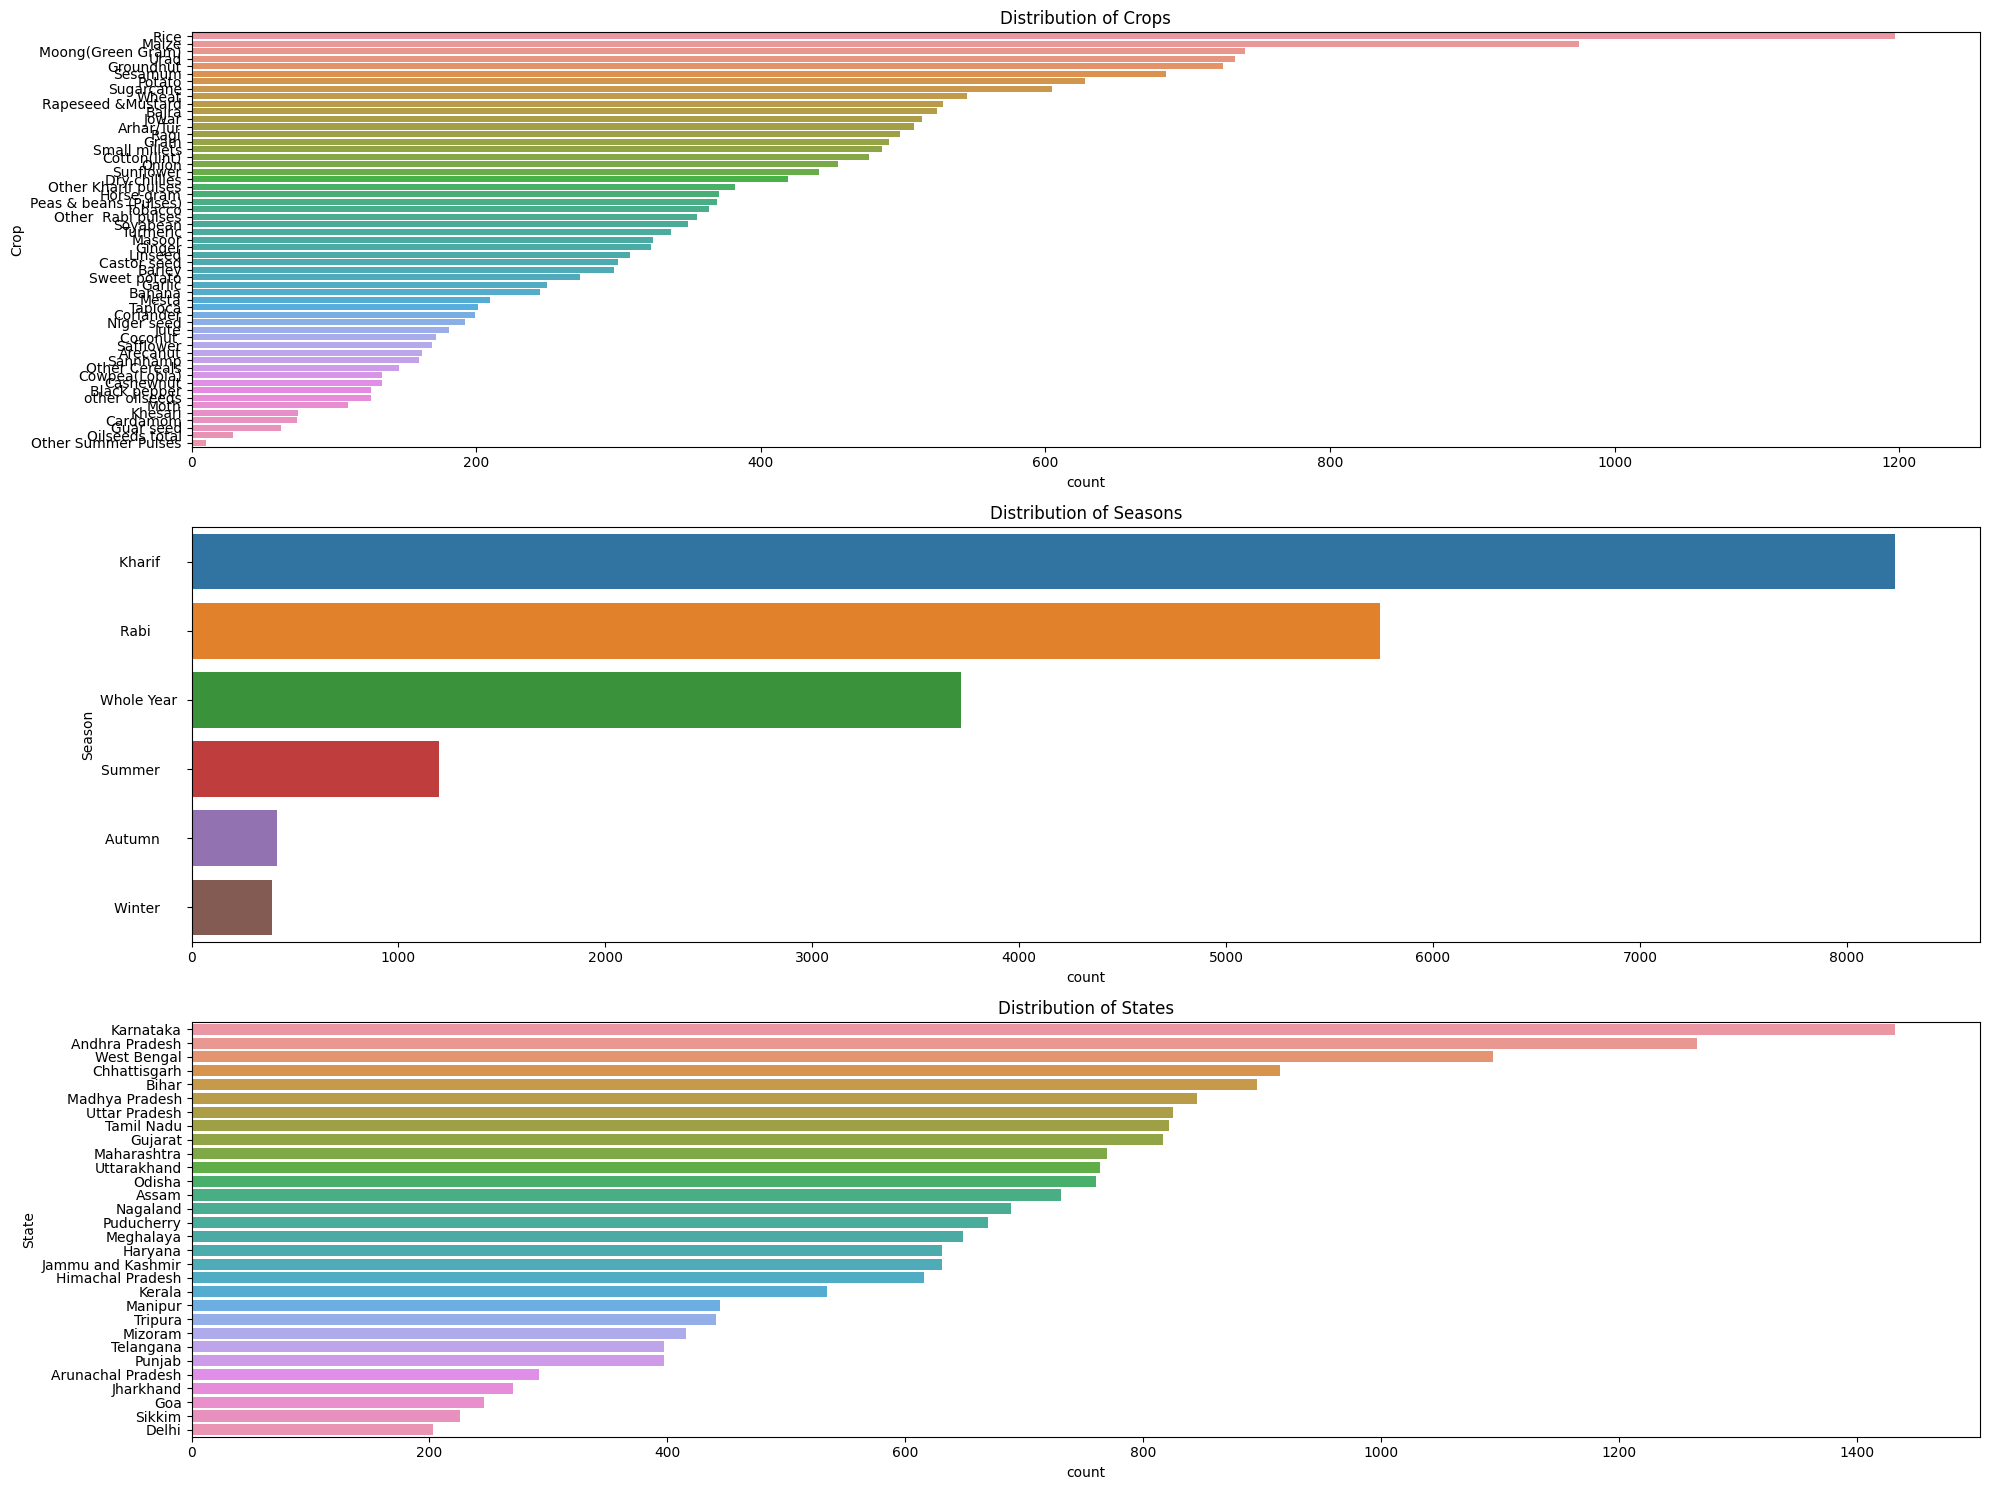

In [12]:
# 3. Count Plots for categorical features
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.countplot(y=df['Crop'], order=df['Crop'].value_counts().index)
plt.title('Distribution of Crops')

plt.subplot(3, 1, 2)
sns.countplot(y=df['Season'], order=df['Season'].value_counts().index)
plt.title('Distribution of Seasons')

plt.subplot(3, 1, 3)
sns.countplot(y=df['State'], order=df['State'].value_counts().index)
plt.title('Distribution of States')

plt.tight_layout()
plt.show()

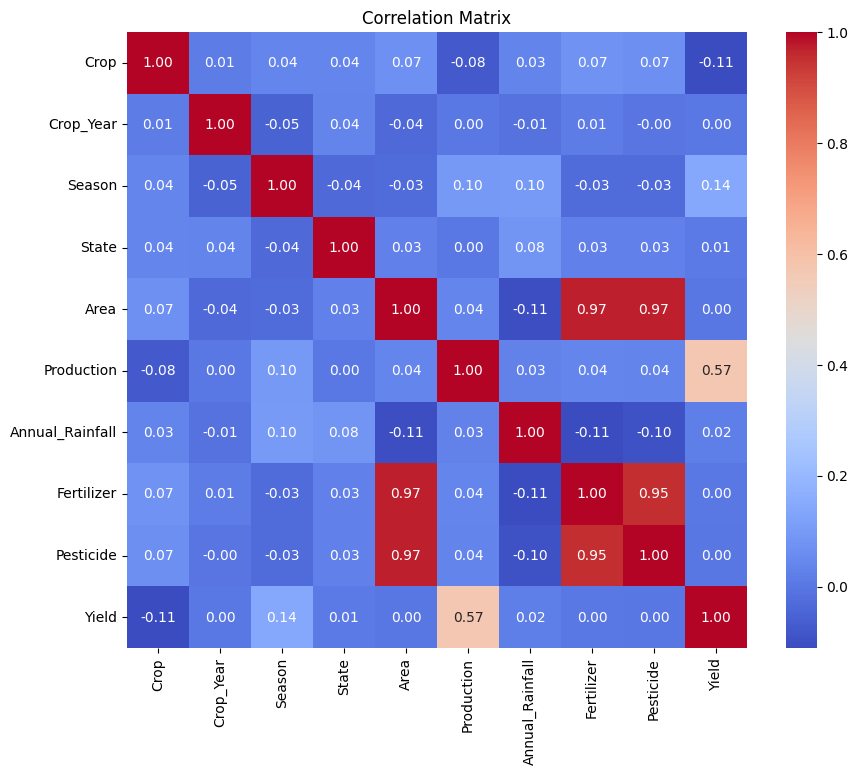

In [13]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = encoded_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

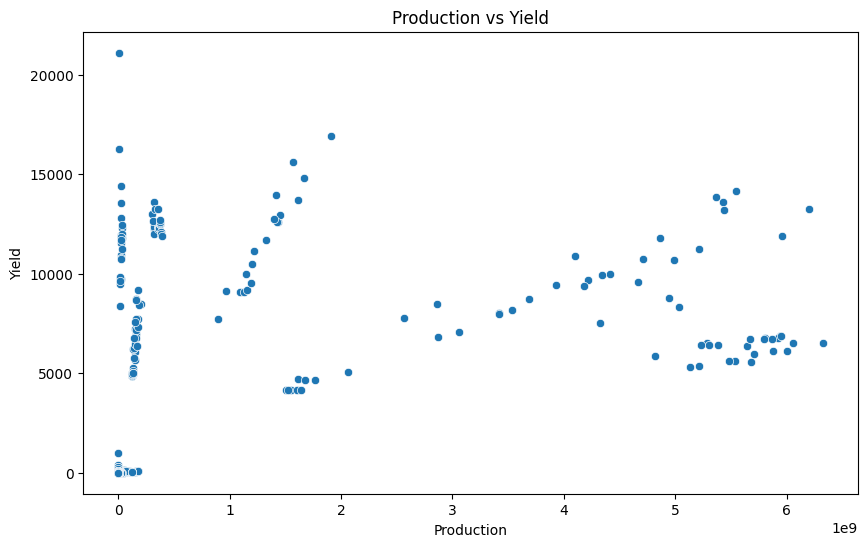

In [14]:
# Scatter plot for Production vs Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(data=encoded_df, x='Production', y='Yield')
plt.title('Production vs Yield')
plt.xlabel('Production')
plt.ylabel('Yield')
plt.show()

### Seasonal Trends in Crop Yields

<Figure size 1200x800 with 0 Axes>

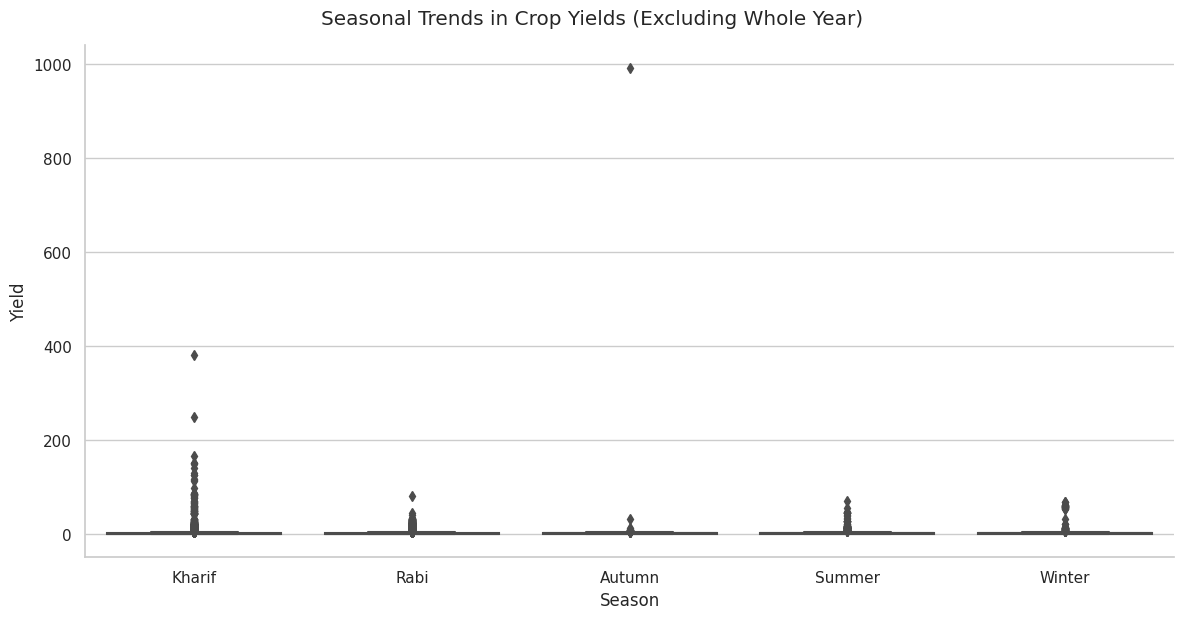

In [15]:
# Create a copy of the dataset
df_seasonal = df.copy()

# Strip spaces from the 'Season' column
df_seasonal['Season'] = df_seasonal['Season'].str.strip()

# Exclude the "Whole Year" category for better visualization
df_seasonal = df_seasonal[df_seasonal['Season'] != 'Whole Year']

# Verify that "Whole Year" is excluded
assert 'Whole Year' not in df_seasonal['Season'].unique(), "Whole Year category still present in the dataset"

# Analyze how crop yields vary by season
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a catplot for seasonal trends in crop yields
cat_plot = sns.catplot(x='Season', y='Yield', data=df_seasonal, kind='box', height=6, aspect=2)
cat_plot.set_axis_labels("Season", "Yield")
cat_plot.fig.suptitle('Seasonal Trends in Crop Yields (Excluding Whole Year)', y=1.03)

plt.show()

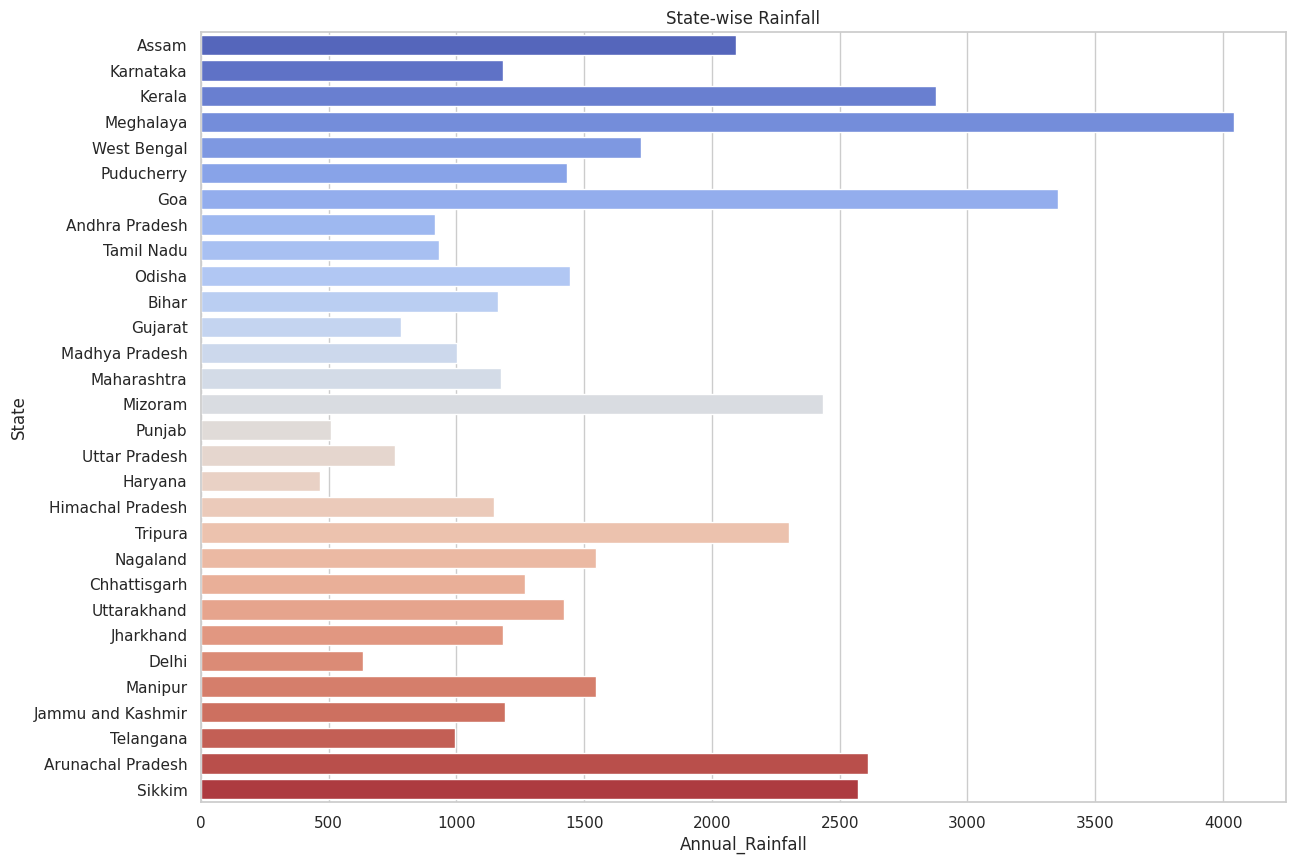

In [16]:
# Create a copy of the dataset for state-wise analysis
df_statewise = df.copy()

# Strip spaces from relevant columns if necessary
df_statewise['State'] = df_statewise['State'].str.strip()
df_statewise['Season'] = df_statewise['Season'].str.strip()
# Analyze state-wise rainfall
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create a barplot for state-wise rainfall
bar_plot_rainfall = sns.barplot(x='Annual_Rainfall', y='State', data=df_statewise, errorbar=None, palette='coolwarm')
bar_plot_rainfall.set_xlabel("Annual_Rainfall")
bar_plot_rainfall.set_ylabel("State")
bar_plot_rainfall.set_title('State-wise Rainfall')

plt.show()

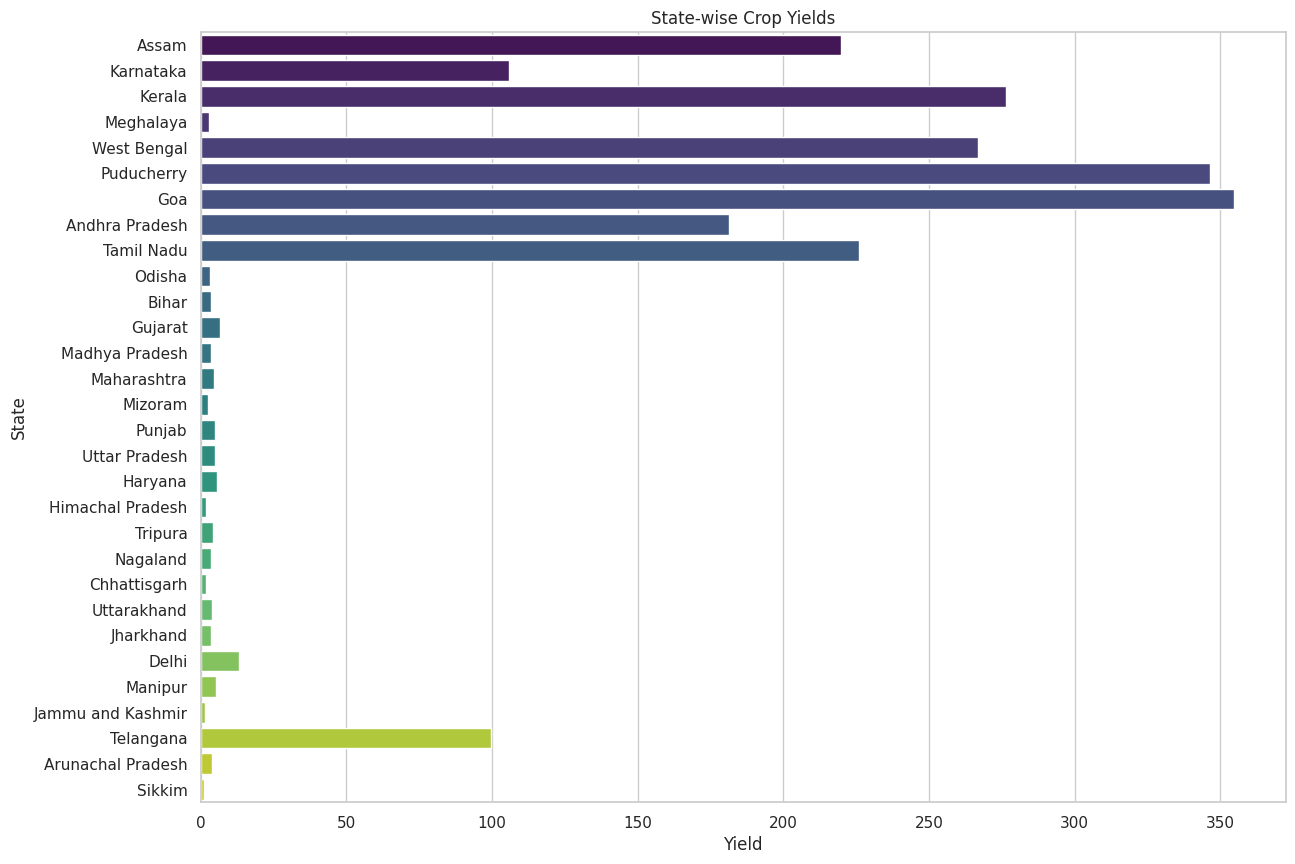

In [17]:
# Analyze state-wise crop yields
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create a barplot for state-wise crop yields
bar_plot = sns.barplot(x='Yield', y='State', data=df_statewise, errorbar=None, palette='viridis')
bar_plot.set_xlabel("Yield")
bar_plot.set_ylabel("State")
bar_plot.set_title('State-wise Crop Yields')

plt.show()


### 3. **Trend Analysis**
   - **Time Series Analysis**: Examine how crop yields have changed over the years.
   - **Rainfall Patterns**: Analyze trends in annual rainfall and its impact on crop yields.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


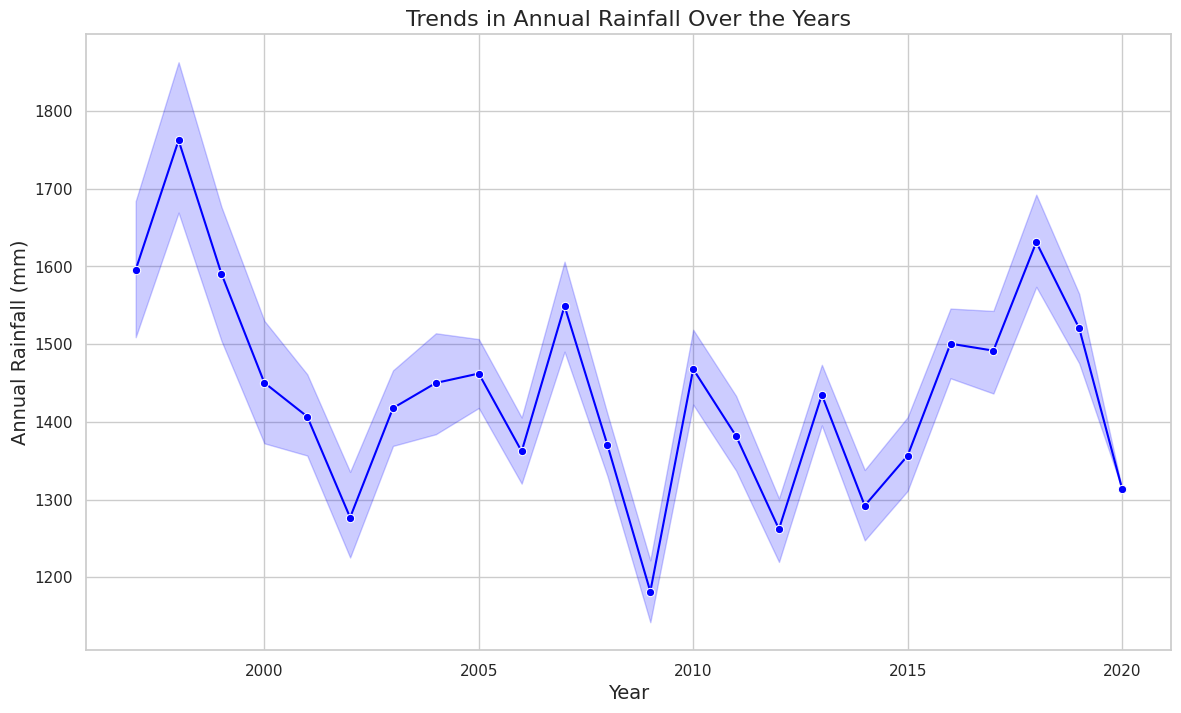

In [18]:
# Assuming df is your original dataset
df_rainfall = df.copy()

# Strip spaces from relevant columns if necessary
df_rainfall['State'] = df_rainfall['State'].str.strip()
df_rainfall['Season'] = df_rainfall['Season'].str.strip()

# Ensure the Year column is properly formatted
df_rainfall['Crop_Year'] = df_rainfall['Crop_Year'].astype(int)
# Set the style of the visualization
sns.set(style="whitegrid")

# Plotting annual rainfall over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_rainfall, x="Crop_Year", y="Annual_Rainfall", marker="o", color="blue")
plt.title("Trends in Annual Rainfall Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annual Rainfall (mm)", fontsize=14)
plt.grid(True)
plt.show()